In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from PredictXANES import xanes_derivatives

Data import of 10,000 calculated average XANES spectra along with averaged coordination numbers, number of Cu atoms within 3 angstroms, and number of Te atoms within 3 angstroms.

In [3]:
df = pd.read_csv('mu_cn10000.csv')

In [4]:
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


## Spectra Only:

Neural network is trained on averaged spectra only. The spectra are split into a training set and testing set with a ratio of 4:1. The predicted features are the coordination number, number of Cu atoms, and number of Te atoms.

In [101]:
X = df.drop(labels=['CN', 'Num Cu', 'Num Te'], axis=1)
y = df[['CN', 'Num Cu', 'Num Te']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=519)

One layer is added, and the depth of the that layer is optimized by looking at the loss from a range of 1 to 100, the maximum number of features being trained on.

In [102]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf)

/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn'

           0
0   0.098752
1   0.097992
2   0.035320
3   0.100339
4   0.103027
5   0.038500
6   0.099376
7   0.022346
8   0.036473
9   0.042880
10  0.037450
11  0.038739
12  0.014527
13  0.031731
14  0.019378
15  0.031486
16  0.011757
17  0.042139
18  0.011201
19  0.012143
20  0.040405
21  0.010913
22  0.016691
23  0.043381
24  0.011137
25  0.037005
26  0.035971
27  0.013256
28  0.037368
29  0.010403
30  0.012371
31  0.013692
32  0.010788
33  0.016949
34  0.011707
35  0.012242
36  0.014968
37  0.036387
38  0.010860
39  0.011299
40  0.042580
41  0.011288
42  0.035141
43  0.016352
44  0.012258
45  0.014370
46  0.015477
47  0.017480
48  0.033233
49  0.010267
50  0.035902
51  0.015462
52  0.012378
53  0.029368
54  0.015196
55  0.035187
56  0.013112
57  0.012717
58  0.043777
59  0.014179
60  0.013502
61  0.033639
62  0.040836
63  0.028402
64  0.010975
65  0.013642
66  0.013544
67  0.010158
68  0.013608
69  0.020842
70  0.018210
71  0.037642
72  0.011289
73  0.020108
74  0.014513
75  0.015967

In [103]:
min_loss = lossdf.idxmin()[0]+1
print(min_loss)
nn = MLPRegressor(hidden_layer_sizes=(min_loss), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


89
0.008453712234150727


In [104]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.02415084019294802, 0.023852709704534163, 0.0004352395629842565]
testing mse = [0.02503176376750448, 0.023852709704534163, 0.0004352395629842565]
training R2 = [0.8718747319358988, 0.9282723118965245, 0.9915168560399865]
testing R2 = [0.8772046898009336, 0.9290720985967467, 0.9913864980386309]


(3.93479262672811, 5.065207373271892, 3.8609515184919534, 5.12422738789589)

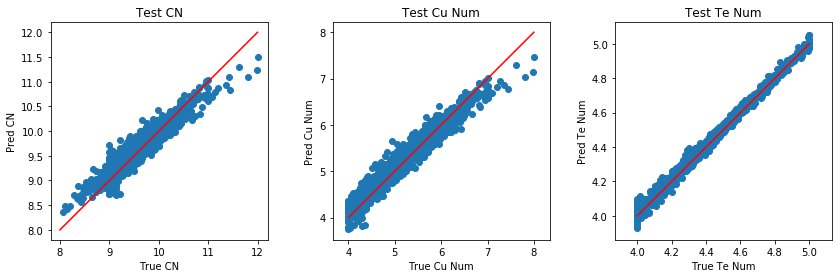

In [105]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


Now, the process is repeated for a second layer. Upon completion, it is seen that the loss does not improve with more than one layer.

In [42]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf1 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf1)

           0
0   0.050704
1   0.026615
2   0.014387
3   0.011625
4   0.044136
5   0.012343
6   0.014782
7   0.045243
8   0.012535
9   0.033961
10  0.019322
11  0.020501
12  0.034714
13  0.010912
14  0.021930
15  0.018415
16  0.014522
17  0.039812
18  0.009688
19  0.018221
20  0.021159
21  0.019659
22  0.017693
23  0.014363
24  0.039744
25  0.016495
26  0.013955
27  0.045518
28  0.022162
29  0.033643
30  0.017673
31  0.017347
32  0.014469
33  0.016130
34  0.020783
35  0.018537
36  0.019912
37  0.018374
38  0.014584
39  0.022445
40  0.013427
41  0.029571
42  0.017107
43  0.028972
44  0.030142
45  0.014020
46  0.015612
47  0.011956
48  0.022646
49  0.018122
50  0.017048
51  0.042709
52  0.015811
53  0.013721
54  0.040236
55  0.014038
56  0.017860
57  0.021405
58  0.041473
59  0.030681
60  0.015552
61  0.043164
62  0.018885
63  0.014907
64  0.018271
65  0.017431
66  0.022009
67  0.015986
68  0.015911
69  0.017464
70  0.014577
71  0.019588
72  0.022317
73  0.015864
74  0.016500
75  0.035596

In [43]:
min_loss1 = lossdf.idxmin()[0]+1
print(min_loss1)
nn = MLPRegressor(hidden_layer_sizes=(min_loss, min_loss1), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


19
0.00968842828093913


In [44]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.027743137239583958, 0.030378980464677918, 0.0008443293538946871]
testing mse = [0.028499620176082003, 0.030378980464677918, 0.0008443293538946871]
training R2 = [0.8528168433328966, 0.9086471070723766, 0.9835433906567616]
testing R2 = [0.8601928440767459, 0.9105670276253636, 0.9834749174899048]


Predicting the spectra with 2 hidden layers is worse than 1 hidden layer.

***

## First Derivative Only:

Here, the neural network is fitted using only the first derivative of the averaged spectra.

In [6]:
d1, d2 = xanes_derivatives.xanes_derivatives(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(d1, y)

In [66]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf2 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf2)

           0
0   0.081106
1   0.015235
2   0.014101
3   0.013859
4   0.013000
5   0.010436
6   0.009748
7   0.009434
8   0.011201
9   0.012229
10  0.007826
11  0.008989
12  0.009938
13  0.008963
14  0.008064
15  0.005544
16  0.006761
17  0.008141
18  0.007078
19  0.006587
20  0.006280
21  0.006217
22  0.007864
23  0.008113
24  0.006909
25  0.005509
26  0.005090
27  0.005190
28  0.007197
29  0.005077
30  0.005677
31  0.006647
32  0.006101
33  0.004673
34  0.005159
35  0.006360
36  0.004982
37  0.004845
38  0.004703
39  0.005306
40  0.004862
41  0.005056
42  0.005061
43  0.005259
44  0.004535
45  0.005004
46  0.004419
47  0.004973
48  0.005002
49  0.004802
50  0.005067
51  0.004515
52  0.004233
53  0.005675
54  0.005945
55  0.004753
56  0.004142
57  0.004525
58  0.005212
59  0.004642
60  0.004509
61  0.004410
62  0.004405
63  0.005190
64  0.004198
65  0.005452
66  0.004314
67  0.004736
68  0.004767
69  0.005326
70  0.004317
71  0.004554
72  0.004430
73  0.004968
74  0.004925
75  0.004380

In [67]:
min_loss2 = lossdf2.idxmin()[0]+1
print(min_loss2)
nn = MLPRegressor(hidden_layer_sizes=(min_loss2), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


88
0.003953264233806394


In [68]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.010454883258663873, 0.009033305920720979, 0.00038636245586045833]
testing mse = [0.010805145150999175, 0.009033305920720979, 0.00038636245586045833]
training R2 = [0.9445200401239418, 0.9728346855677921, 0.9924903016451624]
testing R2 = [0.9462276286717228, 0.9729946839903213, 0.9920804114886039]


(3.93479262672811, 5.06520737327189, 3.844397350826724, 5.090210186022128)

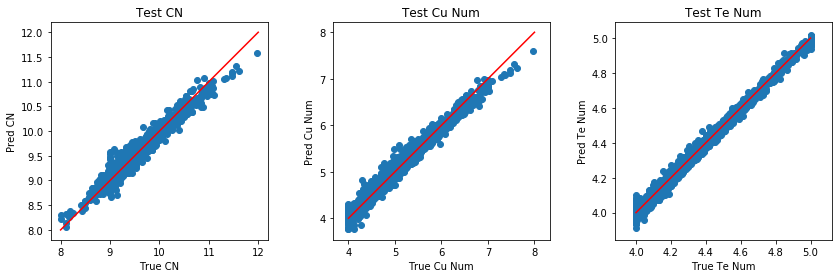

In [69]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


Now repeated for a second layer.

In [70]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss2, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf3 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf3)

           0
0   0.012917
1   0.004801
2   0.003185
3   0.003725
4   0.003796
5   0.003318
6   0.003864
7   0.003357
8   0.003551
9   0.003421
10  0.003028
11  0.003767
12  0.003339
13  0.003612
14  0.002573
15  0.003388
16  0.003073
17  0.002935
18  0.003288
19  0.003206
20  0.003156
21  0.002831
22  0.003125
23  0.002962
24  0.003876
25  0.002721
26  0.003552
27  0.003309
28  0.003077
29  0.003040
30  0.003123
31  0.003011
32  0.002951
33  0.003109
34  0.002837
35  0.002927
36  0.002771
37  0.003113
38  0.003149
39  0.002888
40  0.003189
41  0.002946
42  0.002923
43  0.002945
44  0.003116
45  0.002686
46  0.002961
47  0.002880
48  0.002652
49  0.003007
50  0.003258
51  0.003217
52  0.003282
53  0.003465
54  0.003362
55  0.002590
56  0.002500
57  0.003186
58  0.002720
59  0.003375
60  0.003047
61  0.002963
62  0.002732
63  0.002735
64  0.002950
65  0.002954
66  0.002838
67  0.002821
68  0.003143
69  0.002920
70  0.002308
71  0.002992
72  0.002835
73  0.002923
74  0.002826
75  0.002873

In [71]:
min_loss3 = lossdf3.idxmin()[0]+1
print(min_loss3)
nn = MLPRegressor(hidden_layer_sizes=(min_loss2, min_loss3), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


71
0.00230771546255763


In [72]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.006615080453695289, 0.005786846233842842, 0.0002289161173119672]
testing mse = [0.006696098017972571, 0.005786846233842842, 0.0002289161173119672]
training R2 = [0.964896365739543, 0.9825975673919574, 0.9955505744321225]
testing R2 = [0.9666765171553788, 0.9831390934491334, 0.9955475852963793]


(3.93479262672811, 5.06520737327189, 3.8580391322584835, 5.109519393378031)

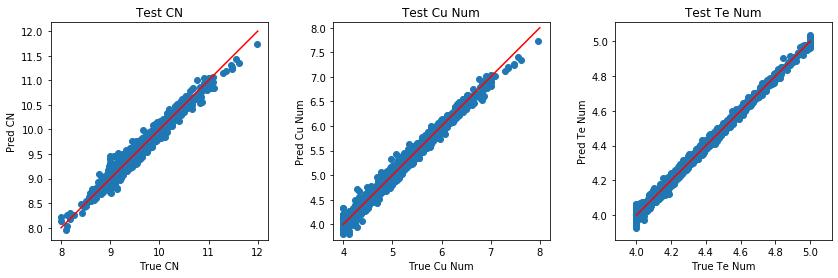

In [73]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


Now repeated for a third layer.

In [74]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss2, min_loss3, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf4 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf4)

/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


           0
0   0.012124
1   0.006103
2   0.003034
3   0.002628
4   0.002951
5   0.003171
6   0.002839
7   0.002970
8   0.003382
9   0.003129
10  0.002479
11  0.002688
12  0.002614
13  0.003080
14  0.002133
15  0.002974
16  0.002647
17  0.002792
18  0.002559
19  0.002878
20  0.002694
21  0.003055
22  0.003201
23  0.002897
24  0.002683
25  0.003165
26  0.002773
27  0.002692
28  0.002846
29  0.002357
30  0.003119
31  0.002645
32  0.002621
33  0.002670
34  0.002318
35  0.003029
36  0.003063
37  0.002599
38  0.002434
39  0.002136
40  0.002749
41  0.002544
42  0.002785
43  0.002586
44  0.003277
45  0.002556
46  0.002906
47  0.002831
48  0.002183
49  0.002874
50  0.002482
51  0.002805
52  0.002723
53  0.002472
54  0.002866
55  0.002655
56  0.003213
57  0.002875
58  0.002671
59  0.002534
60  0.002476
61  0.002708
62  0.002680
63  0.002505
64  0.002584
65  0.002428
66  0.002748
67  0.002431
68  0.002373
69  0.002912
70  0.002388
71  0.002738
72  0.002202
73  0.002459
74  0.002445
75  0.002596

In [75]:
min_loss4 = lossdf4.idxmin()[0]+1
print(min_loss4)
nn = MLPRegressor(hidden_layer_sizes=(min_loss2, min_loss3, min_loss4), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


90
0.002029141136674135


In [76]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.008881024876875164, 0.007210703024889039, 0.0003918502611256496]
testing mse = [0.009219334183970241, 0.007210703024889039, 0.0003918502611256496]
training R2 = [0.9528718885101852, 0.9783156889994101, 0.9923836355818673]
testing R2 = [0.9541195000888919, 0.9786484479004449, 0.9920417978323263]


(3.93479262672811, 5.06520737327189, 3.864120825548851, 5.083856550549968)

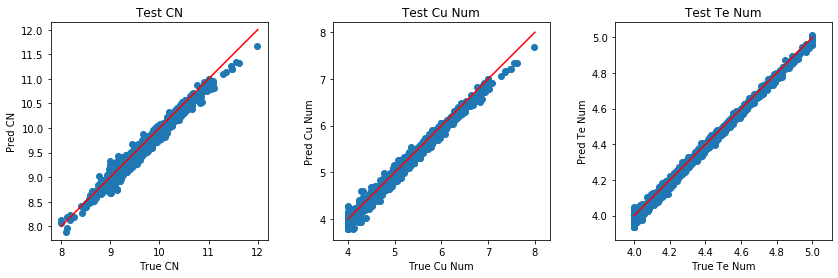

In [77]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


Upon the addition of a fourth layer, the neural network no longer improves.

In [78]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss2, min_loss3, min_loss4, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf5 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf5)

/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


           0
0   0.010964
1   0.002785
2   0.003245
3   0.003073
4   0.002469
5   0.002992
6   0.002569
7   0.003148
8   0.002866
9   0.003020
10  0.003126
11  0.002687
12  0.003050
13  0.002688
14  0.002949
15  0.002871
16  0.003446
17  0.002200
18  0.003243
19  0.002707
20  0.002661
21  0.003090
22  0.002422
23  0.002216
24  0.002552
25  0.002778
26  0.003161
27  0.002164
28  0.002413
29  0.003006
30  0.003075
31  0.002554
32  0.003104
33  0.002896
34  0.002706
35  0.003037
36  0.003885
37  0.002511
38  0.003158
39  0.003030
40  0.002449
41  0.002733
42  0.003132
43  0.003356
44  0.002314
45  0.002479
46  0.003051
47  0.002212
48  0.002789
49  0.003481
50  0.002621
51  0.004184
52  0.003032
53  0.003008
54  0.002947
55  0.002666
56  0.002639
57  0.002121
58  0.002517
59  0.003182
60  0.002985
61  0.003352
62  0.003122
63  0.003204
64  0.002725
65  0.002473
66  0.002122
67  0.002979
68  0.002870
69  0.003112
70  0.002718
71  0.002946
72  0.002603
73  0.002288
74  0.002684
75  0.002928

In [79]:
min_loss5 = lossdf5.idxmin()[0]+1
print(min_loss5)
nn = MLPRegressor(hidden_layer_sizes=(min_loss2, min_loss3, min_loss4, min_loss5), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


58
0.002121063513914656


In [80]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.008078170013142014, 0.00737170190646122, 0.0002467783646298282]
testing mse = [0.007912462678792982, 0.00737170190646122, 0.0002467783646298282]
training R2 = [0.9571323239951345, 0.9778315268023666, 0.9952033872578462]
testing R2 = [0.96062321465012, 0.9791383604530535, 0.9951474947977731]


(3.93479262672811, 5.06520737327189, 3.85821262471782, 5.092113879987586)

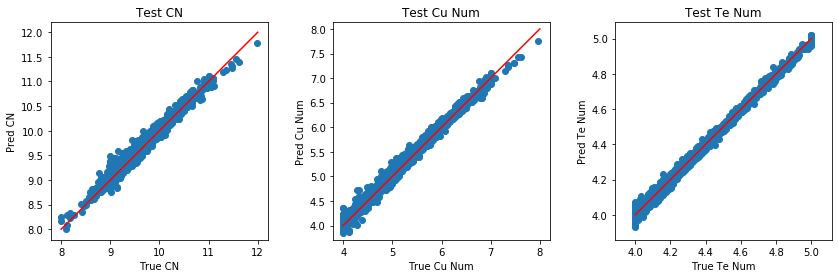

In [81]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


***

## Second Derivative Only

The entire process repeated again for the second derivative.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(d2, y)

In [47]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf6 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf6)

/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


           0
0   0.027132
1   0.014443
2   0.012536
3   0.010561
4   0.011182
5   0.008760
6   0.010012
7   0.009668
8   0.008957
9   0.009382
10  0.008402
11  0.007890
12  0.008486
13  0.008293
14  0.007671
15  0.007387
16  0.007565
17  0.007512
18  0.008051
19  0.007849
20  0.006709
21  0.007530
22  0.007950
23  0.008149
24  0.006809
25  0.007601
26  0.007514
27  0.007588
28  0.007772
29  0.007687
30  0.007150
31  0.007727
32  0.007667
33  0.007035
34  0.007079
35  0.006473
36  0.006698
37  0.006416
38  0.007723
39  0.007507
40  0.007239
41  0.007043
42  0.007115
43  0.007184
44  0.006699
45  0.006951
46  0.006960
47  0.006535
48  0.007445
49  0.006961
50  0.006172
51  0.006751
52  0.006815
53  0.007197
54  0.007326
55  0.006862
56  0.007330
57  0.006920
58  0.006604
59  0.007328
60  0.006988
61  0.006855
62  0.007563
63  0.006746
64  0.007513
65  0.007312
66  0.007082
67  0.006947
68  0.006932
69  0.006601
70  0.006365
71  0.006755
72  0.007047
73  0.006652
74  0.006856
75  0.006749

In [48]:
min_loss6 = lossdf6.idxmin()[0]+1
print(min_loss6)
nn = MLPRegressor(hidden_layer_sizes=(min_loss6), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


51
0.0061720712823249025


In [49]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.015818761529701693, 0.013947371479814492, 0.00034129550348186734]
testing mse = [0.0150474174076426, 0.013947371479814492, 0.00034129550348186734]
training R2 = [0.9187551028000838, 0.958956666671953, 0.9933793642356296]
testing R2 = [0.9174096465557231, 0.959514553689318, 0.9928530719087101]


(3.93479262672811, 5.06520737327189, 3.8511054745720847, 5.203146214723053)

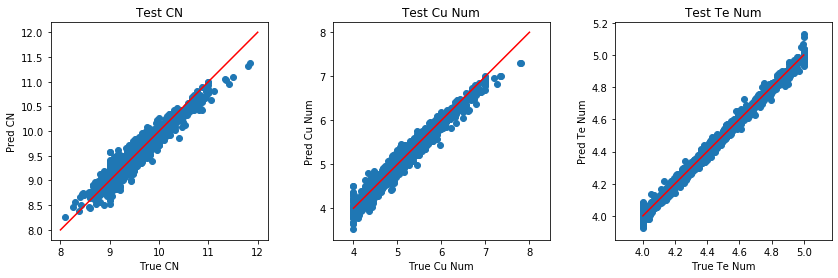

In [50]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [51]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss6, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf7 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf7)

/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


           0
0   0.017253
1   0.006488
2   0.004976
3   0.005382
4   0.006241
5   0.005052
6   0.005621
7   0.005106
8   0.004767
9   0.004347
10  0.005505
11  0.005401
12  0.004410
13  0.004733
14  0.004754
15  0.004691
16  0.004037
17  0.005196
18  0.004863
19  0.005131
20  0.004510
21  0.005433
22  0.004399
23  0.005154
24  0.004996
25  0.005312
26  0.004106
27  0.004571
28  0.004028
29  0.003906
30  0.003924
31  0.003975
32  0.004378
33  0.004416
34  0.004606
35  0.004068
36  0.004549
37  0.004105
38  0.004889
39  0.004301
40  0.004924
41  0.004467
42  0.004127
43  0.005044
44  0.004092
45  0.004685
46  0.004895
47  0.005141
48  0.004075
49  0.004491
50  0.004391
51  0.003917
52  0.004292
53  0.003847
54  0.003329
55  0.005255
56  0.003594
57  0.004303
58  0.004382
59  0.003924
60  0.002965
61  0.004350
62  0.004156
63  0.003098
64  0.004625
65  0.004352
66  0.004338
67  0.004333
68  0.004153
69  0.004110
70  0.004844
71  0.004036
72  0.003444
73  0.003116
74  0.003544
75  0.004275

In [53]:
min_loss7 = lossdf7.idxmin()[0]+1
print(min_loss7)
nn = MLPRegressor(hidden_layer_sizes=(min_loss6, min_loss7), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


97
0.002691031209193694


In [54]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.007201348949725593, 0.006809223632061552, 0.00022184975018400154]
testing mse = [0.006838051873409002, 0.006809223632061552, 0.00022184975018400154]
training R2 = [0.9630139910749249, 0.9799623007359926, 0.9956964379096694]
testing R2 = [0.9624681694010623, 0.9803393895590274, 0.995167649252]


(3.93479262672811, 5.06520737327189, 3.8717126605137095, 5.140604122684596)

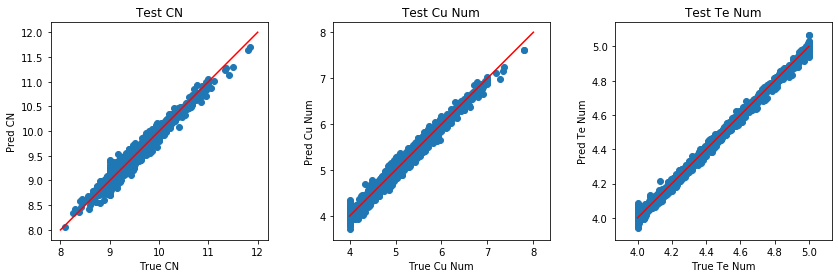

In [55]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [57]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss6, min_loss7, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf8 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf8)

           0
0   0.011138
1   0.003836
2   0.003648
3   0.003429
4   0.004757
5   0.002827
6   0.003217
7   0.003233
8   0.003364
9   0.003493
10  0.004016
11  0.002307
12  0.003878
13  0.002719
14  0.002694
15  0.002258
16  0.003526
17  0.003273
18  0.003808
19  0.003576
20  0.003565
21  0.003304
22  0.002805
23  0.002531
24  0.003529
25  0.002680
26  0.003234
27  0.002206
28  0.001948
29  0.001976
30  0.002858
31  0.002762
32  0.003353
33  0.002121
34  0.002700
35  0.004206
36  0.002920
37  0.002648
38  0.001945
39  0.002002
40  0.002473
41  0.003107
42  0.002984
43  0.002238
44  0.002376
45  0.002989
46  0.002452
47  0.002197
48  0.002682
49  0.002804
50  0.002806
51  0.002611
52  0.002656
53  0.003131
54  0.002604
55  0.002111
56  0.002528
57  0.002266
58  0.001759
59  0.003481
60  0.001999
61  0.002311
62  0.003081
63  0.003519
64  0.002132
65  0.003064
66  0.002877
67  0.002905
68  0.002563
69  0.002651
70  0.002390
71  0.002099
72  0.001826
73  0.002188
74  0.003898
75  0.002678

In [58]:
min_loss8 = lossdf8.idxmin()[0]+1
print(min_loss8)
nn = MLPRegressor(hidden_layer_sizes=(min_loss6, min_loss7, min_loss8), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


79
0.0015171614610981305


In [59]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.005920704217180554, 0.00500588869882977, 0.0003229822779164997]
testing mse = [0.005747152996912755, 0.00500588869882977, 0.0003229822779164997]
training R2 = [0.9695913612091088, 0.9852690265856526, 0.9937346141434137]
testing R2 = [0.9684557565956614, 0.9852524418330566, 0.993279700797106]


(3.93479262672811, 5.06520737327189, 3.8688345551015773, 5.107988047236257)

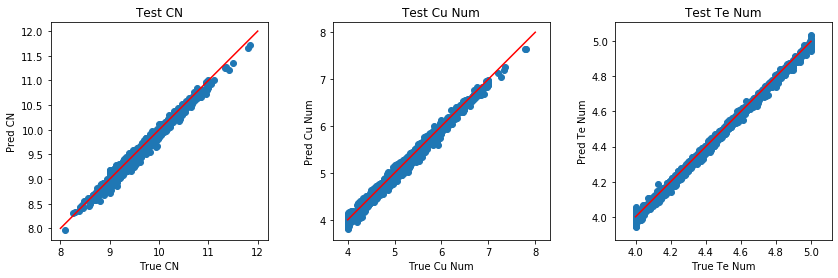

In [60]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [61]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss6, min_loss7, min_loss8, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf9 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf9)

           0
0   0.012246
1   0.002686
2   0.002086
3   0.002485
4   0.002495
5   0.003106
6   0.002851
7   0.001765
8   0.003113
9   0.002742
10  0.003338
11  0.002530
12  0.002622
13  0.001931
14  0.002785
15  0.002409
16  0.002153
17  0.002273
18  0.002448
19  0.003122
20  0.002775
21  0.003514
22  0.002364
23  0.002037
24  0.002433
25  0.003228
26  0.002385
27  0.001702
28  0.002329
29  0.002680
30  0.002446
31  0.001550
32  0.002516
33  0.002951
34  0.002864
35  0.002901
36  0.002683
37  0.002624
38  0.004152
39  0.002491
40  0.001869
41  0.002846
42  0.002565
43  0.002898
44  0.001859
45  0.002742
46  0.002797
47  0.002655
48  0.002392
49  0.002336
50  0.002628
51  0.002475
52  0.002575
53  0.002874
54  0.002131
55  0.003489
56  0.002045
57  0.002759
58  0.002261
59  0.002807
60  0.002249
61  0.003525
62  0.001847
63  0.002837
64  0.002923
65  0.002496
66  0.003316
67  0.003214
68  0.002993
69  0.003458
70  0.003616
71  0.002314
72  0.003584
73  0.004633
74  0.002245
75  0.003354

In [62]:
min_loss9 = lossdf9.idxmin()[0]+1
print(min_loss9)
nn = MLPRegressor(hidden_layer_sizes=(min_loss6, min_loss7, min_loss8, min_loss9), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


32
0.0015495267810688624


In [63]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.005487542939318447, 0.005134303382851187, 0.00016810033507631188]
testing mse = [0.00558820056008494, 0.005134303382851187, 0.00016810033507631188]
training R2 = [0.9718160703574712, 0.9848911369819998, 0.9967390982914957]
testing R2 = [0.9693281945418415, 0.9839021662878175, 0.9964991883061697]


(3.93479262672811, 5.06520737327189, 3.883370836004134, 5.138999644751794)

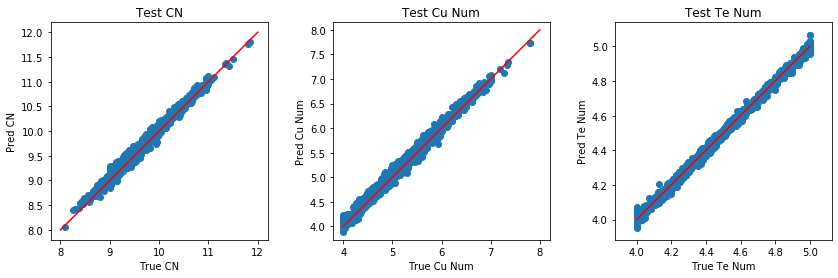

In [64]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


***

## First and Second Derivative

Finally, the process repeated for training with both the first and second derivative.

In [82]:
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = pd.concat([df1, df2], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df3, y)

In [84]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf10 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf10)

            0
0    0.016803
1    0.011957
2    0.009380
3    0.009005
4    0.009652
5    0.007350
6    0.007536
7    0.006977
8    0.008682
9    0.007865
10   0.006108
11   0.006768
12   0.006536
13   0.005905
14   0.008869
15   0.005356
16   0.006415
17   0.005359
18   0.005915
19   0.005843
20   0.004813
21   0.005523
22   0.005481
23   0.006369
24   0.004727
25   0.005868
26   0.005116
27   0.005775
28   0.005817
29   0.005375
30   0.005321
31   0.005923
32   0.004856
33   0.005379
34   0.004815
35   0.004775
36   0.004820
37   0.006045
38   0.004409
39   0.005084
40   0.005473
41   0.004184
42   0.005418
43   0.004990
44   0.005174
45   0.004726
46   0.005580
47   0.005104
48   0.005320
49   0.004454
50   0.004973
51   0.006096
52   0.004984
53   0.004682
54   0.004740
55   0.005375
56   0.004984
57   0.004363
58   0.004572
59   0.004731
60   0.005235
61   0.005247
62   0.005272
63   0.005278
64   0.004452
65   0.004353
66   0.005119
67   0.004418
68   0.005483
69   0.004824
70   0

In [85]:
min_loss10 = lossdf10.idxmin()[0]+1
print(min_loss10)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

165
0.0037715298596210536


In [86]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.008457322621773835, 0.007552135984121688, 0.0003198033535073567]
testing mse = [0.008379700659958958, 0.007552135984121688, 0.0003198033535073567]
training R2 = [0.9561648881523147, 0.9776699388703108, 0.9938425244622289]
testing R2 = [0.9553062898996426, 0.9773132180559483, 0.9937485432580887]


(3.93479262672811, 5.06520737327189, 3.8822783001377035, 5.122909380398377)

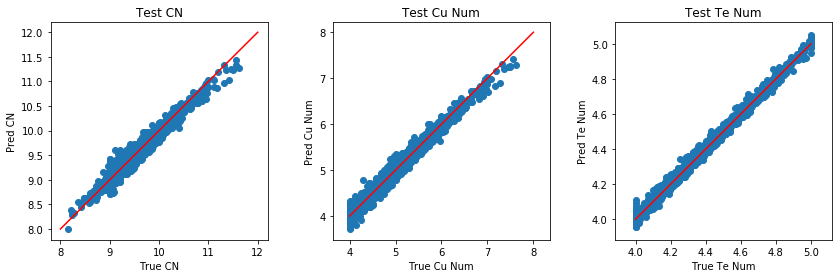

In [87]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [88]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf11 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf11)

            0
0    0.012361
1    0.005006
2    0.004654
3    0.003750
4    0.004040
5    0.004134
6    0.003130
7    0.003504
8    0.003946
9    0.003885
10   0.002772
11   0.003042
12   0.003338
13   0.003806
14   0.003034
15   0.003352
16   0.003496
17   0.003370
18   0.003288
19   0.003777
20   0.002079
21   0.003437
22   0.003135
23   0.003066
24   0.003155
25   0.003189
26   0.003085
27   0.003111
28   0.002485
29   0.002917
30   0.003334
31   0.002640
32   0.003111
33   0.003059
34   0.003368
35   0.003129
36   0.002895
37   0.002868
38   0.003192
39   0.002416
40   0.002448
41   0.003112
42   0.002138
43   0.002666
44   0.003229
45   0.002707
46   0.002777
47   0.003040
48   0.002922
49   0.002128
50   0.003125
51   0.003147
52   0.002424
53   0.002780
54   0.003349
55   0.003157
56   0.003102
57   0.002988
58   0.002085
59   0.003429
60   0.003011
61   0.002267
62   0.003338
63   0.002435
64   0.003276
65   0.002754
66   0.002571
67   0.002936
68   0.002896
69   0.002250
70   0

In [89]:
min_loss11 = lossdf11.idxmin()[0]+1
print(min_loss11)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

102
0.001421297550301121


In [90]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.0031459137697585093, 0.002945401107947318, 0.00019705151186991517]
testing mse = [0.0032646544611887856, 0.002945401107947318, 0.00019705151186991517]
training R2 = [0.9836944281154059, 0.9912910748786568, 0.996205981423544]
testing R2 = [0.9825877407813127, 0.9906673224113877, 0.9961794048489961]


(3.93479262672811, 5.06520737327189, 3.881207316881549, 5.107828722249019)

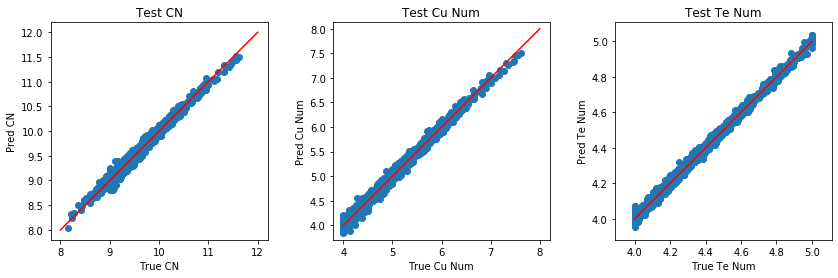

In [91]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [92]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf12 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf12)

            0
0    0.013474
1    0.002070
2    0.002120
3    0.001922
4    0.002006
5    0.002796
6    0.001899
7    0.001621
8    0.001467
9    0.001938
10   0.001913
11   0.002316
12   0.001671
13   0.001657
14   0.002096
15   0.003036
16   0.002493
17   0.001561
18   0.001757
19   0.001999
20   0.001655
21   0.002562
22   0.001600
23   0.002349
24   0.001645
25   0.002175
26   0.002356
27   0.002021
28   0.002222
29   0.001977
30   0.002844
31   0.001610
32   0.002090
33   0.001461
34   0.001930
35   0.002118
36   0.002319
37   0.001922
38   0.001495
39   0.001393
40   0.001557
41   0.001666
42   0.001938
43   0.001397
44   0.002166
45   0.001731
46   0.002053
47   0.001601
48   0.001658
49   0.002062
50   0.002312
51   0.002353
52   0.002123
53   0.001273
54   0.001633
55   0.002030
56   0.001263
57   0.002104
58   0.002134
59   0.001400
60   0.001796
61   0.002241
62   0.001987
63   0.002309
64   0.002028
65   0.001743
66   0.001908
67   0.001710
68   0.001793
69   0.001727
70   0

In [93]:
min_loss12 = lossdf12.idxmin()[0]+1
print(min_loss12)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

173
0.001191719424861401


In [94]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.0037419057352988693, 0.003600958633979686, 0.0001652358619166622]
testing mse = [0.0038928277506589063, 0.003600958633979686, 0.0001652358619166622]
training R2 = [0.9806053447685648, 0.9893527305928669, 0.9968185581340661]
testing R2 = [0.9792373353155759, 0.9885939458399335, 0.9968501246701991]


(3.93479262672811, 5.06520737327189, 3.873440162333388, 5.097616702797572)

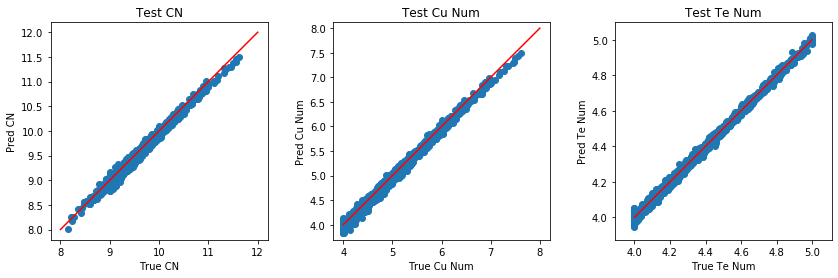

In [95]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [96]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf13 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf13)

            0
0    0.046195
1    0.018917
2    0.001838
3    0.002286
4    0.001826
5    0.002048
6    0.001596
7    0.001604
8    0.001538
9    0.002004
10   0.002320
11   0.002751
12   0.002455
13   0.002807
14   0.002609
15   0.001950
16   0.002394
17   0.001515
18   0.002187
19   0.002492
20   0.001943
21   0.001652
22   0.001589
23   0.002040
24   0.002707
25   0.001750
26   0.002135
27   0.001778
28   0.001933
29   0.001600
30   0.001699
31   0.002203
32   0.002456
33   0.001905
34   0.002166
35   0.002074
36   0.001861
37   0.001990
38   0.002558
39   0.001927
40   0.001899
41   0.001521
42   0.001601
43   0.001810
44   0.001681
45   0.001687
46   0.002009
47   0.001681
48   0.001822
49   0.001528
50   0.001647
51   0.001298
52   0.001992
53   0.001814
54   0.002045
55   0.002757
56   0.002470
57   0.001549
58   0.001568
59   0.001677
60   0.001869
61   0.002168
62   0.001808
63   0.001767
64   0.001194
65   0.001669
66   0.002263
67   0.002309
68   0.001400
69   0.002151
70   0

In [97]:
min_loss13 = lossdf13.idxmin()[0]+1
print(min_loss13)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

65
0.001191719424861401


In [98]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.0037419057352988693, 0.003600958633979686, 0.0001652358619166622]
testing mse = [0.0038928277506589063, 0.003600958633979686, 0.0001652358619166622]
training R2 = [0.9806053447685648, 0.9893527305928669, 0.9968185581340661]
testing R2 = [0.9792373353155759, 0.9885939458399335, 0.9968501246701991]


(3.93479262672811, 5.06520737327189, 3.873440162333388, 5.097616702797572)

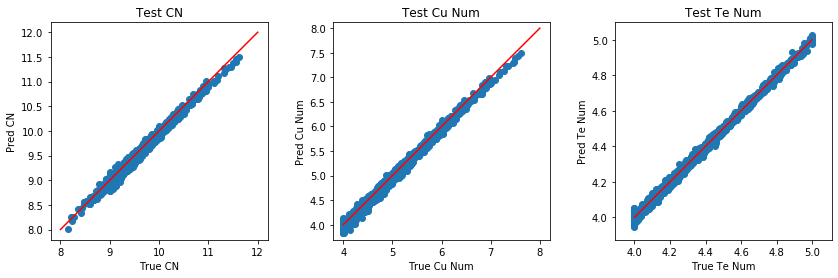

In [99]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')
